In [1]:
import folium
import geopandas 
import pandas as pd
import json
import random
import requests
import os
import numpy as np
from branca.colormap import linear

#  csv dades vacunació

In [2]:
vac_csv = f"C:/capes_sql/vacunacio.csv"
vaccinacio = pd.read_csv(vac_csv, sep=',')

vaccinacio.head(5)

,SEXE_CODI,SEXE,PROVINCIA_CODI,PROVINCIA,COMARCA_CODI,COMARCA,MUNICIPI_CODI,MUNICIPI,DISTRICTE_CODI,DISTRICTE,DOSI,DATA,FABRICANT,NO_VACUNAT,RECOMPTE
0,0.0,Home,8.0,Barcelona,17.0,GARRAF,8270.0,SITGES,NaN,No classificat,2,16/03/2021,BioNTech / Pfizer,NaN,56
1,1.0,Dona,8.0,Barcelona,41.0,VALLES ORIENTAL,8209.0,SANT FOST DE CAMPSENTELLES,NaN,No classificat,1,11/01/2021,BioNTech / Pfizer,NaN,43
2,1.0,Dona,8.0,Barcelona,11.0,BAIX LLOBREGAT,8073.0,CORNELLÀ DE LLOBREGAT,NaN,No classificat,2,31/01/2021,BioNTech / Pfizer,NaN,18
3,1.0,Dona,43.0,Tarragona,30.0,RIBERA D'EBRE,43019.0,ASCÓ,NaN,No classificat,2,06/05/2021,BioNTech / Pfizer,NaN,11
4,1.0,Dona,8.0,Barcelona,24.0,OSONA,8233.0,SANT PERE DE TORELLÓ,NaN,No classificat,2,13/05/2021,BioNTech / Pfizer,NaN,1


In [3]:
#geojson online
#munisj=f"https://raw.githubusercontent.com/aariste/GeoJSON-Mapas/master/comarques-tarragona.geojson"
#geo_json_data = json.loads(requests.get(munisj).text)

# JSON from local


In [6]:
geojson_data=geopandas.read_file('C:/capes_sql/limits_muni_catalunya.geojson')
geojson_data.head(3)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry
0,0.0,,0.0,,,301.0,Puig-reig,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9..."
1,0.0,,0.0,,,309.0,Bassella,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."
2,0.0,,0.0,,,310.0,Osor,171169,,,8,,Osor,17116,"MULTIPOLYGON (((2.61606 41.92397, 2.61418 41.9..."


<AxesSubplot:>

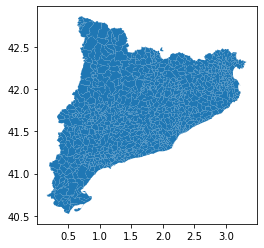

In [7]:
geojson_data.plot()

# Check null values and data types

In [8]:
vaccinacio.isnull().sum()

SEXE_CODI            883
SEXE                   0
PROVINCIA_CODI      2246
PROVINCIA              1
COMARCA_CODI        2246
COMARCA                1
MUNICIPI_CODI       2245
MUNICIPI               1
DISTRICTE_CODI    401626
DISTRICTE              0
DOSI                   0
DATA                   0
FABRICANT              0
NO_VACUNAT        391734
RECOMPTE               0
dtype: int64

In [9]:
vaccinacio.dtypes

SEXE_CODI         float64
SEXE               object
PROVINCIA_CODI    float64
PROVINCIA          object
COMARCA_CODI      float64
COMARCA            object
MUNICIPI_CODI     float64
MUNICIPI           object
DISTRICTE_CODI    float64
DISTRICTE          object
DOSI                int64
DATA               object
FABRICANT          object
NO_VACUNAT         object
RECOMPTE            int64
dtype: object

In [10]:
print("Number of lines present:", 
      len(vaccinacio))

Number of lines present: 419155


# Número de vacunes administrades

In [11]:
vaccinacio["RECOMPTE"].sum()

7116928

In [12]:
vaccinacio["RECOMPTE"].max()

1870

In [13]:
vaccinacio.describe()

,SEXE_CODI,PROVINCIA_CODI,COMARCA_CODI,MUNICIPI_CODI,DISTRICTE_CODI,DOSI,RECOMPTE
count,418272.000000,416909.000000,416909.000000,416910.000000,17529.000000,419155.000000,419155.000000
mean,0.519399,17.616338,20.778537,17762.667055,5.554852,1.374391,16.979227
std,0.499624,12.727305,12.728745,12725.612267,2.876464,0.483966,56.088077
min,0.000000,8.000000,1.000000,8001.000000,1.000000,1.000000,1.000000
25%,0.000000,8.000000,11.000000,8134.000000,3.000000,1.000000,1.000000
50%,1.000000,8.000000,20.000000,8298.000000,6.000000,1.000000,3.000000
75%,1.000000,25.000000,33.000000,25072.000000,8.000000,2.000000,10.000000
max,1.000000,43.000000,42.000000,43907.000000,10.000000,2.000000,1870.000000


In [14]:
vaccinacio.groupby(['MUNICIPI']).sum()

,SEXE_CODI,PROVINCIA_CODI,COMARCA_CODI,MUNICIPI_CODI,DISTRICTE_CODI,DOSI,RECOMPTE
MUNICIPI,,,,,,,
(Altres municipis),697.0,0.0,0.0,0.0,0.0,1844,21770
ABRERA,509.0,7704.0,10593.0,7704963.0,0.0,1328,11226
AGRAMUNT,327.0,16400.0,24928.0,16401968.0,0.0,913,5619
AGUILAR DE SEGARRA,86.0,1376.0,1204.0,1376344.0,0.0,239,233
AGULLANA,153.0,5049.0,594.0,5049297.0,0.0,407,749
...,...,...,...,...,...,...,...
VINYOLS I ELS ARCS,262.0,21199.0,3944.0,21286754.0,0.0,682,1736
XERTA,234.0,18490.0,3870.0,18512360.0,0.0,596,1345
ÀGER,112.0,5500.0,5060.0,5500440.0,0.0,307,538


# Ordenat per municipi

In [15]:
vac_m = vaccinacio.groupby(['MUNICIPI']).sum()

In [16]:
#legend

colormap = linear.YlGn_09.scale(
    vac_m.RECOMPTE.min(), vac_m.RECOMPTE.max()
)

print(colormap(5.0))

colormap

#ffffe5ff


In [17]:
vac_m.head(5)

,SEXE_CODI,PROVINCIA_CODI,COMARCA_CODI,MUNICIPI_CODI,DISTRICTE_CODI,DOSI,RECOMPTE
MUNICIPI,,,,,,,
(Altres municipis),697.0,0.0,0.0,0.0,0.0,1844,21770
ABRERA,509.0,7704.0,10593.0,7704963.0,0.0,1328,11226
AGRAMUNT,327.0,16400.0,24928.0,16401968.0,0.0,913,5619
AGUILAR DE SEGARRA,86.0,1376.0,1204.0,1376344.0,0.0,239,233
AGULLANA,153.0,5049.0,594.0,5049297.0,0.0,407,749


# csv munis-població

In [18]:
pobl_csv = f"C:/capes_sql/pomuni.csv"
pobl = pd.read_csv(pobl_csv, sep=';',skiprows=range(0, 4))#comensa a la 5, mo oblidar sep
pobl.head(5)

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total
0,2020,250019,Abella de la Conca,De 0 anys,0.0,0.0,0
1,2020,250019,Abella de la Conca,D'1 any,0.0,2.0,2
2,2020,250019,Abella de la Conca,De 2 anys,1.0,0.0,1
3,2020,250019,Abella de la Conca,De 3 anys,0.0,0.0,0
4,2020,250019,Abella de la Conca,De 4 anys,0.0,1.0,1


In [19]:
malament = pobl.groupby(['Nom municipi']).sum()

In [20]:
#tipus de dades de cada camp
print(pobl.dtypes)

Unnamed: 0         int64
Codi municipi      int64
Nom municipi      object
Edat              object
Homes            float64
Dones            float64
Total             object
dtype: object


In [21]:
pobl['Habitants'] = pobl['Homes'] + pobl['Dones']
pobl.head(5)

,Unnamed: 0,Codi municipi,Nom municipi,Edat,Homes,Dones,Total,Habitants
0,2020,250019,Abella de la Conca,De 0 anys,0.0,0.0,0,0.0
1,2020,250019,Abella de la Conca,D'1 any,0.0,2.0,2,2.0
2,2020,250019,Abella de la Conca,De 2 anys,1.0,0.0,1,1.0
3,2020,250019,Abella de la Conca,De 3 anys,0.0,0.0,0,0.0
4,2020,250019,Abella de la Conca,De 4 anys,0.0,1.0,1,1.0


In [22]:
#pobl = pobl.drop(columns=['Total'])

In [23]:
#Canviar tipus de dades de la col
pobl['Habitants'] = pobl['Habitants'].astype(np.int64)

In [24]:
pobl_t = pobl.groupby(['Nom municipi']).sum()


In [25]:
pobl_t.head()

,Unnamed: 0,Codi municipi,Homes,Dones,Habitants
Nom municipi,,,,,
Abella de la Conca,206040,25501938,198.000,168.000,366
Abrera,206040,8161836,6331.325,6219.213,12550
Agramunt,206040,25503060,2712.710,2703.701,5416
Aguilar de Segarra,206040,8162346,296.000,268.000,564
Agullana,206040,17341020,862.000,864.000,1726


In [26]:
pobl = pobl_t.drop(columns=['Unnamed: 0', 'Dones', 'Homes'])

In [27]:
pobl.head()

,Codi municipi,Habitants
Nom municipi,,
Abella de la Conca,25501938,366
Abrera,8161836,12550
Agramunt,25503060,5416
Aguilar de Segarra,8162346,564
Agullana,17341020,1726


# Preparació ajuntar taules

In [28]:
vac_m.head(5)

,SEXE_CODI,PROVINCIA_CODI,COMARCA_CODI,MUNICIPI_CODI,DISTRICTE_CODI,DOSI,RECOMPTE
MUNICIPI,,,,,,,
(Altres municipis),697.0,0.0,0.0,0.0,0.0,1844,21770
ABRERA,509.0,7704.0,10593.0,7704963.0,0.0,1328,11226
AGRAMUNT,327.0,16400.0,24928.0,16401968.0,0.0,913,5619
AGUILAR DE SEGARRA,86.0,1376.0,1204.0,1376344.0,0.0,239,233
AGULLANA,153.0,5049.0,594.0,5049297.0,0.0,407,749


In [29]:
# eliminar col
vac_m = vac_m.drop(columns=['SEXE_CODI', 'PROVINCIA_CODI', 'COMARCA_CODI','DISTRICTE_CODI','DOSI'])

In [30]:
print(vac_m.dtypes)

MUNICIPI_CODI    float64
RECOMPTE           int64
dtype: object


In [31]:
print(pobl.dtypes)

Codi municipi    int64
Habitants        int64
dtype: object


In [32]:
pobl.shape

(947, 2)

In [33]:
vac_m.shape

(769, 2)

In [34]:
# afegir la columna de lindex
pobl['Municipi'] = pobl.index

In [35]:
vac_m['Municipi'] = vac_m.index

In [36]:
print(pobl.dtypes)
print(vac_m.dtypes)

Codi municipi     int64
Habitants         int64
Municipi         object
dtype: object
MUNICIPI_CODI    float64
RECOMPTE           int64
Municipi          object
dtype: object


In [37]:
pobl.head()

,Codi municipi,Habitants,Municipi
Nom municipi,,,
Abella de la Conca,25501938,366,Abella de la Conca
Abrera,8161836,12550,Abrera
Agramunt,25503060,5416,Agramunt
Aguilar de Segarra,8162346,564,Aguilar de Segarra
Agullana,17341020,1726,Agullana


In [38]:
vac_m.head()

,MUNICIPI_CODI,RECOMPTE,Municipi
MUNICIPI,,,
(Altres municipis),0.0,21770,(Altres municipis)
ABRERA,7704963.0,11226,ABRERA
AGRAMUNT,16401968.0,5619,AGRAMUNT
AGUILAR DE SEGARRA,1376344.0,233,AGUILAR DE SEGARRA
AGULLANA,5049297.0,749,AGULLANA


# Canviar pobl col Municipi a majuscules

In [39]:
pobl['Municipi'] = pobl['Municipi'].str.upper()
pobl.head()

,Codi municipi,Habitants,Municipi
Nom municipi,,,
Abella de la Conca,25501938,366,ABELLA DE LA CONCA
Abrera,8161836,12550,ABRERA
Agramunt,25503060,5416,AGRAMUNT
Aguilar de Segarra,8162346,564,AGUILAR DE SEGARRA
Agullana,17341020,1726,AGULLANA


# Joints

Left join
Include all observations found in A:

In [87]:
df_m = pd.merge(pobl, vac_m, how='left')
df_m.head(6)

,Codi municipi,Habitants,Municipi,MUNICIPI_CODI,RECOMPTE
0,25501938,366,ABELLA DE LA CONCA,NaN,NaN
1,8161836,12550,ABRERA,7704963.0,11226.0
2,25503060,5416,AGRAMUNT,16401968.0,5619.0
3,8162346,564,AGUILAR DE SEGARRA,1376344.0,233.0
4,17341020,1726,AGULLANA,5049297.0,749.0
5,8174484,2514,AIGUAFREDA,5056834.0,2549.0


In [96]:
#creacio nova col
df_m['Taxa_vacunacio'] = df_m['RECOMPTE']/df_m['Habitants']*100
df_m.head(6)

,Codi municipi,Habitants,Municipi,MUNICIPI_CODI,RECOMPTE,Taxa_vacunacio
0,25501938,366,ABELLA DE LA CONCA,NaN,NaN,NaN
1,8161836,12550,ABRERA,7704963.0,11226.0,89.450199
2,25503060,5416,AGRAMUNT,16401968.0,5619.0,103.748154
3,8162346,564,AGUILAR DE SEGARRA,1376344.0,233.0,41.312057
4,17341020,1726,AGULLANA,5049297.0,749.0,43.395133
5,8174484,2514,AIGUAFREDA,5056834.0,2549.0,101.392204


# Join data amb spatial data

In [97]:
import geopandas as gpd
import geoplot as gplt


In [98]:
geoData = geojson_data
geoData.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9..."
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."


In [99]:
# trans muni json en maj
geoData['nom_muni'] = geoData['nom_muni'].str.upper()
geoData.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_id,codi_ptgc,cap_muni,codiine,geometry
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,4,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9..."
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,7,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."


In [100]:
print(df_m.dtypes)

Codi municipi       int64
Habitants           int64
Municipi           object
MUNICIPI_CODI     float64
RECOMPTE          float64
Taxa_vacunacio    float64
dtype: object


In [101]:
print(geoData.dtypes)

codi_ine_6       object
provincia1       object
codi_costa       object
codi_ptgc_       object
comarca1         object
id               object
nom_muni         object
municipi         object
codi_cadas       object
codi_aft         object
_feature_id      object
codi_ptgc        object
cap_muni         object
codiine          object
geometry       geometry
dtype: object


In [102]:
# Make sure the "id" column is an integer
#geoData.id = geoData.id.astype(str).astype(int)

In [103]:
print(df_m.dtypes)

Codi municipi       int64
Habitants           int64
Municipi           object
MUNICIPI_CODI     float64
RECOMPTE          float64
Taxa_vacunacio    float64
dtype: object


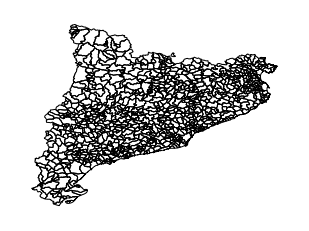

In [104]:
gplt.polyplot(geoData, figsize=(20, 4));

# Merge spatial & numeric data

In [105]:
fullData = geoData.merge(df_m, left_on=['nom_muni'], right_on=['Municipi'])
fullData.head(2)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,...,codi_ptgc,cap_muni,codiine,geometry,Codi municipi,Habitants,Municipi,MUNICIPI_CODI,RECOMPTE,Taxa_vacunacio
0,0.0,,0.0,,,301.0,PUIG-REIG,081751,,,...,,Puig-reig,08175,"MULTIPOLYGON (((1.86341 41.91648, 1.86089 41.9...",8338602,4299,PUIG-REIG,5264700.0,4661.0,108.420563
1,0.0,,0.0,,,309.0,BASSELLA,250447,,,...,,Bassella,25044,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9...",25545594,434,BASSELLA,NaN,NaN,NaN


In [106]:
print(fullData.dtypes)

codi_ine_6          object
provincia1          object
codi_costa          object
codi_ptgc_          object
comarca1            object
id                  object
nom_muni            object
municipi            object
codi_cadas          object
codi_aft            object
_feature_id         object
codi_ptgc           object
cap_muni            object
codiine             object
geometry          geometry
Codi municipi        int64
Habitants            int64
Municipi            object
MUNICIPI_CODI      float64
RECOMPTE           float64
Taxa_vacunacio     float64
dtype: object


# Choropleth map with GeoPlot

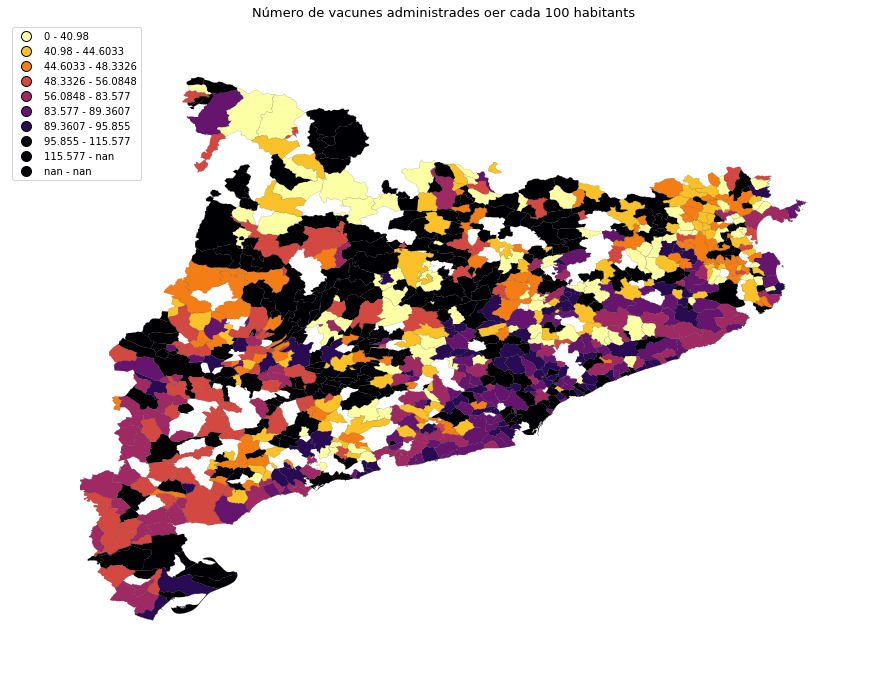

In [113]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['Taxa_vacunacio'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="Taxa_vacunacio", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Número de vacunes administrades oer cada 100 habitants', fontsize=13);